# Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
import warnings
warnings.filterwarnings('ignore')

# Data Asset Overview

In [102]:
Crosswalk = pd.read_csv(r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/Crosswalk.csv',encoding = "cp1252")
ACS       = pd.read_csv('https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/raw_data/census_raw.csv')
FHFA      = pd.read_csv('https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/raw_data/fhfa_raw.csv').drop(columns='Warning')
FRED      = pd.read_csv('https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/raw_data/fred_raw.csv')
#BLS       = pd.read_csv('https://raw.githubusercontent.com/mattlibonati/Temp_data/main/Crosswalk')
#Zillow    = pd.read_csv('https://raw.githubusercontent.com/mattlibonati/Temp_data/main/Crosswalk')
Redfin    = pd.read_csv('https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/redfin.csv')

In [43]:
print(f'Crosswalk:{Crosswalk.shape}')
display(Crosswalk.head())

Crosswalk:(3144, 10)


,CountyName,StateName,StateFIPS,CountyFIPS,MetroName_Zillow,CBSAName,CountyRegionID_Zillow,MetroRegionID_Zillow,FIPS,CBSACode
0,Hudson,New Jersey,34,17,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1106,394913.0,34017,35620.0
1,Morris,New Jersey,34,27,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1241,394913.0,34027,35620.0
2,Nassau,New York,36,59,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1252,394913.0,36059,35620.0
3,Orange,New York,36,71,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1290,394913.0,36071,35620.0
4,Putnam,New York,36,79,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1343,394913.0,36079,35620.0


# Census Data (ASC)

ACS (Census) UNPROCESSED:(74083, 6)


,Unnamed: 0,GEOID,NAME,variable,estimate,moe
0,1,20161,"Riley County, Kansas",transportation_drive_alone,28264.0,971.0
1,2,20161,"Riley County, Kansas",transportation_public,85.0,66.0
2,3,20161,"Riley County, Kansas",one_person_household,8595.0,699.0
3,4,20161,"Riley County, Kansas",more_than_200k,1379.0,248.0
4,5,20161,"Riley County, Kansas",mhhi,53296.0,2489.0


ACS (Census):(3221, 25)


,GEOID,NAME,mean_household_size_owner,transportation_drive_alone,transportation_public,one_person_household,more_than_200k,mhhi,mhhi_family,mhhi_nonfamily,...,median_number_rooms,median_gross_rent,median_year_built,plumbing_complete,kitchen_complete,median_gross_rent_frac_income,lower_quartile_home_value,median_home_value,upper_quartile_home_value,electricity_cost
0,20161,"Riley County, Kansas",2.48,28264.0,85.0,8595.0,1379.0,53296.0,76786.0,37950.0,...,5.3,968.0,1984.0,26554.0,26523.0,31.5,146900.0,211500.0,286400.0,2167.0
1,19159,"Ringgold County, Iowa",2.54,1606.0,7.0,585.0,79.0,57700.0,76250.0,30345.0,...,6.2,639.0,1962.0,1847.0,1840.0,29.5,63800.0,111300.0,217600.0,14.0
2,30009,"Carbon County, Montana",2.37,3575.0,19.0,1547.0,269.0,63178.0,82083.0,34108.0,...,5.4,841.0,1981.0,4500.0,4494.0,24.4,187800.0,297500.0,477300.0,367.0
3,16007,"Bear Lake County, Idaho",2.96,1927.0,17.0,521.0,81.0,60337.0,75882.0,25673.0,...,6.4,598.0,1971.0,2223.0,2230.0,26.4,97200.0,160200.0,270600.0,478.0
4,55011,"Buffalo County, Wisconsin",2.49,5401.0,7.0,1650.0,136.0,61167.0,75954.0,35044.0,...,6.2,730.0,1971.0,5505.0,5505.0,25.2,106800.0,164500.0,245300.0,138.0


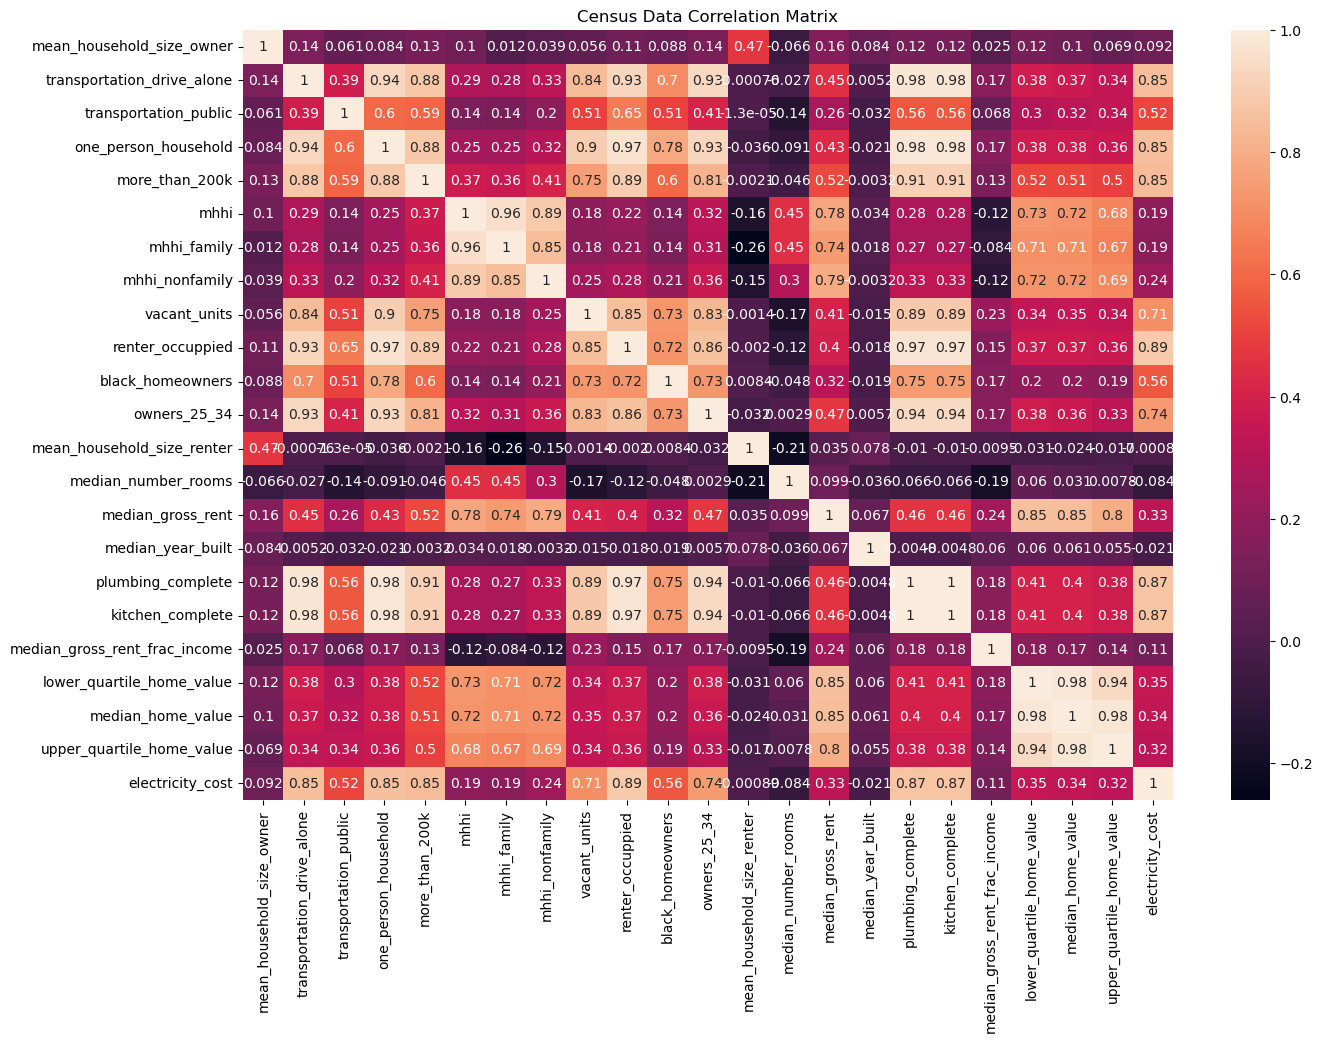

,Field,Format,source,Missing Ratio %,Unique_Values,Number of Unique Values
0,GEOID,int64,Census,0.0,"[20161, 19159, 30009, 16007, 55011, 31185, 8037, 42129, 40079, 48053, 36017, 20109, 47053, 27061, 25017, 36119, 46093, 54107, 19021, 47021, 5019, ...",3221
1,transportation_drive_alone,float64,Census,0.0,"[28264.0, 1606.0, 3575.0, 1927.0, 5401.0, 5465.0, 22881.0, 137279.0, 15529.0, 15599.0, 16658.0, 1044.0, 17826.0, 14614.0, 535295.0, 261955.0, 1185...",3032
2,transportation_public,float64,Census,0.0,"[85.0, 7.0, 19.0, 17.0, 0.0, 1232.0, 1688.0, 5.0, 56.0, 29.0, 199.0, 86237.0, 96701.0, 257.0, 45.0, 46.0, 615.0, 123.0, 44.0, 21858.0, 25.0, 90.0,...",743
3,one_person_household,float64,Census,0.0,"[8595.0, 585.0, 1547.0, 521.0, 1650.0, 1655.0, 4933.0, 47915.0, 4696.0, 4502.0, 5893.0, 360.0, 5591.0, 5421.0, 164475.0, 97661.0, 2641.0, 11569.0,...",2719
4,more_than_200k,float64,Census,0.0,"[1379.0, 79.0, 269.0, 81.0, 136.0, 325.0, 3069.0, 9429.0, 394.0, 1306.0, 678.0, 80.0, 615.0, 655.0, 146256.0, 91683.0, 431.0, 1163.0, 307.0, 539.0...",1546


In [107]:
print(f'ACS (Census) UNPROCESSED:{ACS.shape}')
display(ACS.head())

# create tabular dataset
ASC_1 = ACS[ACS['variable'] == 'mean_household_size_owner']
ASC_1.rename(columns = {'estimate':'mean_household_size_owner'}, inplace = True)
ASC_1 = ASC_1[['GEOID','NAME','mean_household_size_owner']]

for var in [var for var in ACS.variable.unique() if var != 'mean_household_size_owner']:
    tmp_df = ACS[ACS['variable'] == var]
    tmp_df.rename(columns = {'estimate':var}, inplace = True)
    tmp_df = tmp_df[['GEOID','NAME',var]]
    ASC_1 = pd.merge(ASC_1,tmp_df,on=['GEOID','NAME'],how='outer')

print(f'ACS (Census):{ASC_1.shape}')
display(ASC_1.head())

# Correlation Matrix
plt.rcParams['figure.figsize'] = [15, 10]
ASC_1_correls = ASC_1[[col for col in ASC_1.columns if col not in ('GEOID')]] 
sns.heatmap(ASC_1_correls.corr(), annot=True).set(title='Census Data Correlation Matrix')
plt.show()

# data details
census_data_details = data_details(ASC_1,'Census')
census_data_details.head()

In [84]:
#  Census Outliers
Census_scan = outlier_scan(ASC_1,'Census')

scanned_df = pd.DataFrame()

for col in Census_scan['Field']:
    l_limt = Census_scan[Census_scan['Field'] == col]['L_Limit'].values[0]
    u_limt = Census_scan[Census_scan['Field'] == col]['U_Limit'].values[0]

    breaks_l = len(ASC_1[ASC_1[col] < l_limt])
    breaks_u = len(ASC_1[ASC_1[col] > u_limt])
  
    scanned_df = scanned_df.append(pd.DataFrame([['Census',col,breaks_l,breaks_u]])) 
    
scanned_df.columns = ['Source','Field','Break_L_Limit','Break_U_Limit']

census_outliers = pd.merge(Census_scan, scanned_df,on=['Source','Field'],how = 'left')
census_outliers.head()

,Source,Field,L_Limit,U_Limit,Break_L_Limit,Break_U_Limit
0,Census,GEOID,-21580.000,86716.000,0,0
1,Census,mean_household_size_owner,2.035,3.115,21,122
2,Census,transportation_drive_alone,-26865.500,54114.500,0,446
3,Census,transportation_public,-176.500,299.500,0,537
4,Census,one_person_household,-7878.000,16386.000,0,421


# FRED - Mortgage Rates

FRED:(2715, 2)


,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


,MORTGAGE30US
count,2715.000000
mean,7.747974
std,3.270478
min,2.650000
25%,5.105000
50%,7.420000
75%,9.500000
max,18.630000


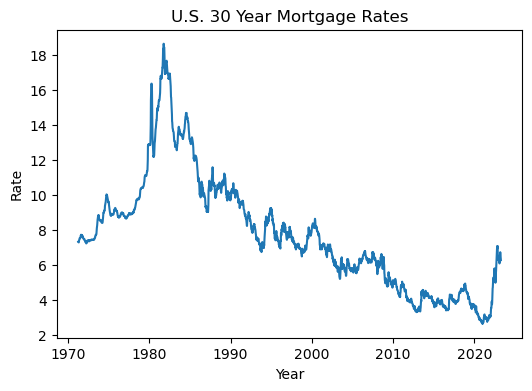

In [54]:
print(f'FRED:{FRED.shape}')
FRED['DATE'] = pd.to_datetime(FRED['DATE'])
display(FRED.head())
display(FRED.describe())

plt.rcParams['figure.figsize'] = [6, 4]
sns.lineplot(x='DATE', y='MORTGAGE30US', data=FRED)
plt.title("U.S. 30 Year Mortgage Rates")
plt.ylabel("Rate")
plt.xlabel("Year")
plt.show()

In [77]:
#  FRED Outliers
FRED_scan = outlier_scan(FRED,'FRED')
FRED_scan = FRED_scan[FRED_scan['Field'] != 'DATE'] 

scanned_df = pd.DataFrame()

for col in FRED_scan['Field']:
    l_limt = FRED_scan[FRED_scan['Field'] == col]['L_Limit'].values[0]
    u_limt = FRED_scan[FRED_scan['Field'] == col]['U_Limit'].values[0]

    breaks_l = len(FRED[FRED[col] < l_limt])
    breaks_u = len(FRED[FRED[col] > u_limt])
  
    scanned_df = scanned_df.append(pd.DataFrame([['FRED',col,breaks_l,breaks_u]])) 
    
scanned_df.columns = ['Source','Field','Break_L_Limit','Break_U_Limit']

FRED_outliers = pd.merge(FRED_scan, scanned_df,on=['Source','Field'],how = 'left')
FRED_outliers

,Source,Field,L_Limit,U_Limit,Break_L_Limit,Break_U_Limit
0,FRED,MORTGAGE30US,-1.4875,16.0925,0,72


# FHFA

In [1]:
print(f'FHFA:{FHFA.shape}')
display(FHFA.head())

# descriptive stats for each state
groupby = FHFA[['state','index_nsa']].groupby('state')[['index_nsa']].describe().reset_index()
groupby.rename(columns={'':'State'}, inplace = True)
groupby.columns = groupby.columns.droplevel()

display(groupby.head())

fhfa_data_details = data_details(FHFA, 'FHFA')
fhfa_data_details

NameError: name 'FHFA' is not defined

In [2]:
sns.swarmplot(data=groupby, x="mean").set(title='Mean HPI by State')

NameError: name 'sns' is not defined

[Text(0.5, 1.0, 'Median HPI by State')]

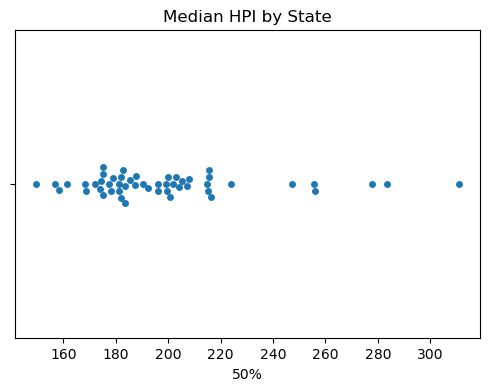

In [62]:
sns.swarmplot(data=groupby, x="50%").set(title='Median HPI by State')

In [75]:
# FHFA Outliers
FHFA_scan = outlier_scan(FHFA,'FHFA')

scanned_df = pd.DataFrame()

for col in FHFA_scan['Field']:
    l_limt = FHFA_scan[FHFA_scan['Field'] == col]['L_Limit'].values[0]
    u_limt = FHFA_scan[FHFA_scan['Field'] == col]['U_Limit'].values[0]

    breaks_l = len(FHFA[FHFA[col] < l_limt])
    breaks_u = len(FHFA[FHFA[col] > u_limt])
  
    scanned_df = scanned_df.append(pd.DataFrame([['FHFA',col,breaks_l,breaks_u]])) 
    
scanned_df.columns = ['Source','Field','Break_L_Limit','Break_U_Limit']

fhfa_outliers = pd.merge(FHFA_scan, scanned_df,on=['Source','Field'],how = 'left')
fhfa_outliers

,Source,Field,L_Limit,U_Limit,Break_L_Limit,Break_U_Limit
0,FHFA,yr,1974.5000,2038.5000,0,0
1,FHFA,qtr,-1.5000,6.5000,0,0
2,FHFA,index_nsa,-9.3675,376.4125,0,251
3,FHFA,index_sa,-9.3050,374.7350,0,251


# Redfin

In [81]:
print(f'Redfin:{Redfin.shape}')
display(Redfin.head())

# details
redfin_data_details = data_details(Redfin, 'Redfin')
redfin_data_details.head()

Redfin:(48849, 59)


Field,Unnamed: 0,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,0,12/1/2017,2017-12-31,30,county,5,396,f,"Larimer County, CO",NaN,...,-0.190476,NaN,NaN,NaN,0.000000,-0.333333,0.000000,"Fort Collins, CO",22660.0,3/19/2023
1,36,12/1/2016,2016-12-31,30,county,5,2932,f,"Orleans County, VT",NaN,...,-0.041176,0.067616,-0.03696,0.019022,0.000000,0.000000,-0.222222,Vermont nonmetropolitan area,NaN,3/19/2023
2,37,12/1/2020,2020-12-31,30,county,5,1396,f,"Mackinac County, MI",NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Michigan nonmetropolitan area,NaN,3/19/2023
3,41,12/1/2019,2019-12-31,30,county,5,888,f,"Starke County, IN",NaN,...,0.139731,NaN,NaN,NaN,0.083333,0.083333,0.083333,Indiana nonmetropolitan area,NaN,3/19/2023
4,48,12/1/2019,2019-12-31,30,county,5,1012,f,"Butler County, KS",NaN,...,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,"Wichita, KS",48620.0,3/19/2023


,Field,Format,source,Missing Ratio %,Unique_Values,Number of Unique Values
0,Unnamed: 0,int64,Redfin,0.0,"[0, 36, 37, 41, 48, 129, 136, 163, 190, 195, 221, 289, 293, 304, 319, 328, 351, 406, 428, 431, 443, 447, 450, 456, 465, 473, 474, 483, 488, 491, 4...",48849
1,period_duration,int64,Redfin,0.0,[30],1
2,region_type_id,int64,Redfin,0.0,[5],1
3,table_id,int64,Redfin,0.0,"[396, 2932, 1396, 888, 1012, 492, 900, 1198, 3098, 2246, 831, 2720, 1238, 331, 849, 486, 978, 3126, 2239, 2924, 1632, 531, 2182, 2477, 1378, 2180,...",2781
4,property_type_id,int64,Redfin,0.0,"[4, 6, 13, 3, -1]",5


In [82]:
#  Redfin Outliers
Redfin_scan = outlier_scan(Redfin,'Redfin')

scanned_df = pd.DataFrame()

for col in Redfin_scan['Field']:
    l_limt = Redfin_scan[Redfin_scan['Field'] == col]['L_Limit'].values[0]
    u_limt = Redfin_scan[Redfin_scan['Field'] == col]['U_Limit'].values[0]

    breaks_l = len(Redfin[Redfin[col] < l_limt])
    breaks_u = len(Redfin[Redfin[col] > u_limt])
  
    scanned_df = scanned_df.append(pd.DataFrame([['Redfin',col,breaks_l,breaks_u]])) 
    
scanned_df.columns = ['Source','Field','Break_L_Limit','Break_U_Limit']

redfin_outliers = pd.merge(Redfin_scan, scanned_df,on=['Source','Field'],how = 'left')
redfin_outliers.head()

,Source,Field,L_Limit,U_Limit,Break_L_Limit,Break_U_Limit
0,Redfin,Unnamed: 0,-424979.5,1272904.5,0,0
1,Redfin,period_duration,30.0,30.0,0,0
2,Redfin,region_type_id,5.0,5.0,0,0
3,Redfin,table_id,-1599.0,4825.0,0,0
4,Redfin,property_type_id,-11.5,16.5,0,0


# Append EDA Datasets

In [110]:
# outliers
outliers_agg = census_outliers.append(FRED_outliers).append(fhfa_outliers).append(redfin_outliers)
outliers_agg.to_csv(r'C:\Users\Mattl\Desktop\Data\EDA Results\outliers.csv')

# data details
data_details_agg = census_data_details.append(fhfa_data_details).append(redfin_data_details)
data_details_agg['Unique_Values'] = data_details_agg['Unique_Values'].str[0:10]
data_details_agg.to_csv(r'C:\Users\Mattl\Desktop\Data\EDA Results\data_details.csv')

# Exploratory Data Analysis

In [105]:
def data_details(data, source):

    meta_df = pd.DataFrame(data = data.dtypes, columns=['Format'])
    meta_df['source'] = source
    meta_df.index.rename('Field', inplace = True)

  ##################################
  # a. Check data completness (NaN's)
  ##################################

    na_df = (data.isnull().sum() / len(data)) * 100      
    na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
    missing_data.index.rename('Field',inplace = True)

    meta_df = meta_df.join(missing_data).fillna(0)

  ##################################
  # b. Review volume of unique values within each column
  ##################################

    unique_df = pd.DataFrame(data=[],columns=['Field','Unique_Values','Number of Unique Values'])

    for col in data.columns:
        unique_df = unique_df.append(pd.DataFrame(data=[[col,
                                                       data[col].unique(),
                                                       len(data[col].value_counts())]],
                                                columns = ['Field','Unique_Values','Number of Unique Values']))

    unique_df.set_index('Field',inplace = True)

    meta_df = meta_df.join(unique_df).sort_values(by = ['Format','Missing Ratio %']).reset_index()    

    pd.set_option('display.max_colwidth', 150)

    return meta_df

#  Outliers IQR Rule

In [106]:
def outlier_scan(df,table):

    outlier_df = pd.DataFrame()

    for col in df.columns:
        try:
            tmp      = df[[col]].dropna()
            tmp      = tmp[col].values.tolist()

            sort_tmp = np.sort(tmp)

            Q1 = np.percentile(tmp, 25, interpolation = 'midpoint')
            Q2 = np.percentile(tmp, 50, interpolation = 'midpoint')
            Q3 = np.percentile(tmp, 75, interpolation = 'midpoint')

            IQR = Q3 - Q1
        
            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR

            tmp_df = pd.DataFrame([[table,col,lower_limit,upper_limit]])
            outlier_df = outlier_df.append(tmp_df)
        except:
            pass

    outlier_df.columns = ['Source','Field','L_Limit','U_Limit']

    return outlier_df

# Time Ranges

In [12]:
redfin['period_end'] = pd.to_datetime(redfin['period_end']) 
redfin.agg({'period_end':['min','max']})

,period_end
min,2012-01-31
max,2023-02-28


# Appendix

This code reads files by sizes. We are working with 25mb limits with Github. .: we need to ensure the dataframes are within size specs.

In [68]:
import pandas as pd

redfin = pd.read_csv(r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/raw_data/fhfa_raw.csv')

redfin.info(verbose = False, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6528 entries, 0 to 6527
Columns: 6 entries, state to Warning
dtypes: float64(2), int64(2), object(2)
memory usage: 306.1+ KB
